In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [2]:
import deap

# Генетические алгоритмы

<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'>
    
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#common'>Описание генетических алгоритмов</a></li>
     <ol>
        <li><a href='#etaps'>Этапы работы генетического алгоритма: отбор, скрещивание, мутация</a></li>
        <li><a href='#удшешыь'>Элитизм</a></li>
     </ol>
<li><a href='#example1'>Пример 1: OneMAX, поиск строки из 0 и 1 с наибольшей суммой элементов</a></li>
<li><a href='#example2'>Пример 2:</a></li>
<li><a href='#links'>Ссылки</a></li>
</ol>
    
    


# Введение <a name='intro'></a>

Генетические алгоритмы позволяют решать задачи оптимизации, используя эволючионные механизмы.

Отбор, скрещивание, мутация.

Элитизм, выбор ниш.

Гиперпараметры.

Стандартные библиотеки deap.

При невозможности установки python и matplotlib для практической работы можно воспользоваться ресурсом "Google colab" https://colab.research.google.com/

Для удобства задачи разбиты на группы, к которым можно быстро перейти в <a href='#toc'>Оглавлении</a>.

<a href='#toc'>Назад к Оглавлению</a>

# Пример 1: OneMAX, поиск строки из 0 и 1 с наибольшей суммой элементов <a name='example1'></a>

In [3]:
a = np.random.choice([0,1], size=[10,20])
a

array([[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]])

<a href='#toc'>Назад к Оглавлению</a>

# Пример 2: Работа с библиотекой DEAP <a name='example2'></a>

Для работы необходимо установить библиотеку deap

<b>pip install deap</b>

In [4]:
from deap import creator, base

In [5]:
class Person():
    
    def __init__(self, name='noname'):
        self.name = name
        
    def __str__(self):
        return("class Person, name: {}".format(self.name))
    

In [6]:
creator.create("Developer", Person, position = "Developer", programming_lang = set)

In [7]:
dev1 = creator.Developer("Steve")

In [8]:
dev1.programming_lang = ['java', 'c']

# Работа с библиотекой DEAP <a name='deap'></a>

In [9]:
from deap import creator, base

In [10]:
class Person():
    
    def __init__(self, name='noname'):
        self.name = name
        
    def __str__(self):
        return("class Person, name: {}".format(self.name))
    

In [11]:
creator.create("Developer", Person, position = "Developer", programming_lang = set)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Developer' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [12]:
dev1 = creator.Developer("Steve")

In [13]:
print(dev1)

class Person, name: Steve


In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [15]:
creator.FitnessMax.values

In [16]:
creator.FitnessMax.wvalues

()

In [17]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [18]:
creator.Individual

deap.creator.Individual

In [19]:
toolbox = base.Toolbox()

In [20]:
def f(name='noname', occupation='none'):
    print("My name is {}, I am a {}".format(name, occupation))

In [21]:
toolbox.register("f_Ivan", f, name='Ivan')
toolbox.register("f_Developer", f, occupation='Developer')

In [22]:
toolbox.f_Ivan()
toolbox.f_Developer()

My name is Ivan, I am a none
My name is noname, I am a Developer


In [23]:
from deap import tools

In [24]:
toolbox.register("select", tools.selRoulette)

In [25]:
toolbox.register("mate", tools.cxOnePoint)

In [26]:
toolbox.register("mutate", tools.mutFlipBit)

In [27]:
toolbox.register("get_val", np.random.choice, [0,1], 10)

randomList = tools.initRepeat(list, toolbox.get_val, 10)

In [28]:
randomList

[array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1]),
 array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])]

In [29]:
def calcFitnessValue(individual):
    return(np.sum(individial))

toolbox.register("evaluate", calcFitnessValue)

# <a href='#toc'>Назад к Оглавлению</a>

In [30]:
creator.create("FitnessMax", base.Fitness, weights=(1.0, 0.2, -1.1,))

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [31]:
creator.FitnessMax.values, creator.FitnessMax.wvalues

(<property at 0x7f929794b5e8>, ())

In [32]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [33]:
creator.Individual

deap.creator.Individual

In [34]:
toolbox = base.Toolbox()

In [35]:
def f(name='noname', occupation='none'):
    print("My name is {}, I am a {}".format(name, occupation))

In [36]:
toolbox.register("f_Ivan", f, name='Ivan')
toolbox.register("f_Developer", f, occupation='Developer')

In [37]:
toolbox.f_Ivan()
toolbox.f_Developer()

My name is Ivan, I am a none
My name is noname, I am a Developer


In [38]:
from deap import tools

In [39]:
toolbox.register("select", tools.selRoulette)

In [40]:
toolbox.register("mate", tools.cxOnePoint)

In [41]:
toolbox.register("mutate", tools.mutFlipBit)

In [42]:
toolbox.register("get_val", np.random.choice, [0,1], 10)

randomList = tools.initRepeat(list, toolbox.get_val, 10)

In [43]:
randomList

[array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])]

In [44]:
def calcFitnessValue(individual):
    return(np.sum(individial))

toolbox.register("evaluate", calcFitnessValue)

In [45]:
from deap import base

In [46]:
def f_Sum_of_Two(x,y):
    return x+y

In [47]:
toolbox = base.Toolbox()

In [48]:
toolbox.register("IncBy5", f_Sum_of_Two, y=5)

In [49]:
toolbox.IncBy5(3)

8

In [50]:
from deap import tools

In [51]:
randomList = tools.initRepeat(list, np.random.random, 3)

In [52]:
randomList

[0.17878562804259723, 0.9590405241019747, 0.2581096871915648]

<a href='#toc'>Назад к Оглавлению</a>

# Пример 3: OneMAX в DEAP <a name='example3'></a>

In [53]:
from deap import base, creator, tools
import matplotlib.pyplot as plt
import numpy as np
import random

In [54]:
ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.9
EPOCHS = 50

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [55]:
toolbox = base.Toolbox()
toolbox.register("fZeroOrOne", random.randint, 0, 1)

In [56]:
toolbox.fZeroOrOne()

0

In [57]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [58]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [59]:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.fZeroOrOne, ONE_MAX_LENGTH)

In [60]:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [61]:
def oneMaxFitness(data):
    return sum(data),

In [62]:
toolbox.register("evaluate", oneMaxFitness)

In [63]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [64]:
toolbox.register("mate", tools.cxTwoPoint)

In [65]:
toolbox.register("mutate", tools.mutFlipBit, indpb=2./ONE_MAX_LENGTH)

In [66]:
maxFitnessValues = []
meanFitnessValues = []


population = toolbox.populationCreator(n=POPULATION_SIZE)
fitnessValues = list(map(toolbox.evaluate, population))

for individial, value in zip(population, fitnessValues):
    individial.fitness.values = value

fitnessValues = [individual.fitness.values[0] for individual in population]    

genCounter = 0
while max(fitnessValues)<ONE_MAX_LENGTH and genCounter<EPOCHS:
    
    genCounter += 1
    
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
            
    for chld1, chld2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(chld1, chld2)
            del chld1.fitness.values
            del chld2.fitness.values
            
    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values
            
    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshIndividualsValues = list(map(toolbox.evaluate, freshIndividuals))
        
    for i in range(len(freshIndividuals)):
        freshIndividuals[i].fitness.values = freshIndividualsValues[i]
                    
    population[:] = offspring

    fitnessValues = [ind.fitness.values[0] for ind in population]
    
    maxFitnessValues.append(max(fitnessValues))
    meanFitnessValues.append(np.mean(fitnessValues))        
    

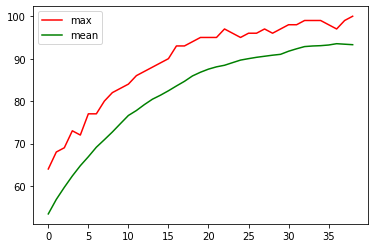

In [67]:
plt.plot(maxFitnessValues, c='r', label='max')
plt.plot(meanFitnessValues, c='g', label='mean')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Пример 3: <a name='example3'></a>

In [68]:
from deap import algorithms

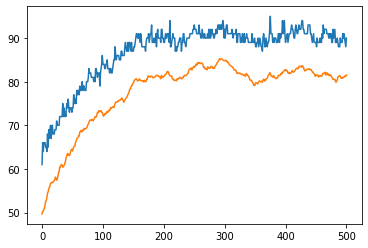

In [69]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)


ONE_MAX_LENGTH = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.2
EPOCHS = 500

toolbox.register("select", tools.selRoulette)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1./ONE_MAX_LENGTH)

population = toolbox.populationCreator(n=POPULATION_SIZE)
fitnessValues = list(map(toolbox.evaluate, population))
for i in range(len(population)):
    population[i].fitness.values = fitnessValues[i]

stats = tools.Statistics(lambda ind: ind.fitness.values)

stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population,
                                          toolbox=toolbox,
                                          mutpb=P_MUTATION,
                                          cxpb=P_CROSSOVER,
                                          ngen=EPOCHS,
                                          stats=stats,
                                          halloffame=tools.HallOfFame(30),
                                          verbose=False
                                         )

Max_, Mean_ = logbook.select("max", "avg")
plt.plot(Max_)
plt.plot(Mean_)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

- https://colab.research.google.com/ - интерактивная среда для программирования на python

- https://github.com/DEAP/deap

- https://deap.readthedocs.io/en/master/

<a href='#toc'>Назад к Оглавлению</a>

In [70]:
class Test():
    
    def __init__(self, a='', b=''):
        self.a = a
        self.b = b
    
    def __str__(self):
        return("class Test, a={}, b={}".format(self.a, self.b))

In [71]:
test = Test(1,2)

In [72]:
print(test)

class Test, a=1, b=2


In [73]:
del test.a

In [74]:
print(test)

AttributeError: 'Test' object has no attribute 'a'

In [ ]:
a = [Test(1,i) for i in range(10)]

In [ ]:
freshElems = [ind for ind in a if ind.b%2]
for elem in freshElems:
    elem.b=10

In [ ]:
for elem in a:
    print(elem)

In [75]:
8**8

16777216

In [76]:
np.math.factorial(8)

40320